In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [69]:
df = pd.read_csv("http://www.calvin.edu/~stob/data/Berkeley.csv")

In [71]:
df.head()

,Admit,Gender,Dept,Freq
0,Admitted,Male,A,512
1,Rejected,Male,A,313
2,Admitted,Female,A,89
3,Rejected,Female,A,19
4,Admitted,Male,B,353


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
Admit     24 non-null object
Gender    24 non-null object
Dept      24 non-null object
Freq      24 non-null int64
dtypes: int64(1), object(3)
memory usage: 848.0+ bytes


In [7]:
df.columns

Index(['Admit', 'Gender', 'Dept', 'Freq'], dtype='object')

In [8]:
df.describe()

,Freq
count,24.000000
mean,188.583333
std,140.063624
min,8.000000
25%,80.000000
50%,170.000000
75%,302.500000
max,512.000000


In [76]:
df['Admit'].value_counts()

Admitted    12
Rejected    12
Name: Admit, dtype: int64

In [130]:
pd.pivot_table(df,columns=df['Gender'],index=df[['Admit','Dept']])

Freq     
Gender        Female Male
Admit    Dept            
Admitted A        89  512
         B        17  353
         C       202  120
         D       131  138
         E        94   53
         F        24   22
Rejected A        19  313
         B         8  207
         C       391  205
         D       244  279
         E       299  138
         F       317  351

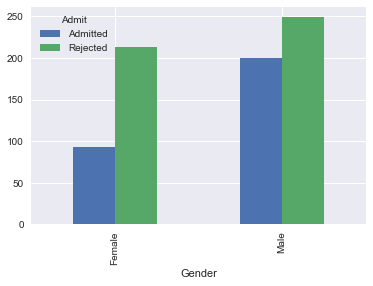

In [97]:
pd.pivot_table(df,index=['Gender'],columns=df['Admit'],values='Freq').plot(kind='bar')

In [99]:
pd.pivot_table(df,index=df['Admit'],columns=df['Gender'],values='Freq')

Gender,Female,Male
Admit,,
Admitted,92.833333,199.666667
Rejected,213.000000,248.833333


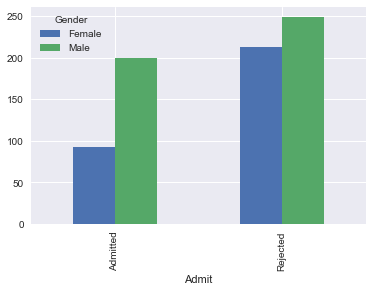

In [100]:
pd.pivot_table(df,index=df['Admit'],columns=df['Gender'],values='Freq').plot(kind='bar')

In [103]:
pd.pivot_table(df,index=df[['Dept','Gender']],columns=df['Admit'],values='Freq')

Admit        Admitted  Rejected
Dept Gender                    
A    Female        89        19
     Male         512       313
B    Female        17         8
     Male         353       207
C    Female       202       391
     Male         120       205
D    Female       131       244
     Male         138       279
E    Female        94       299
     Male          53       138
F    Female        24       317
     Male          22       351

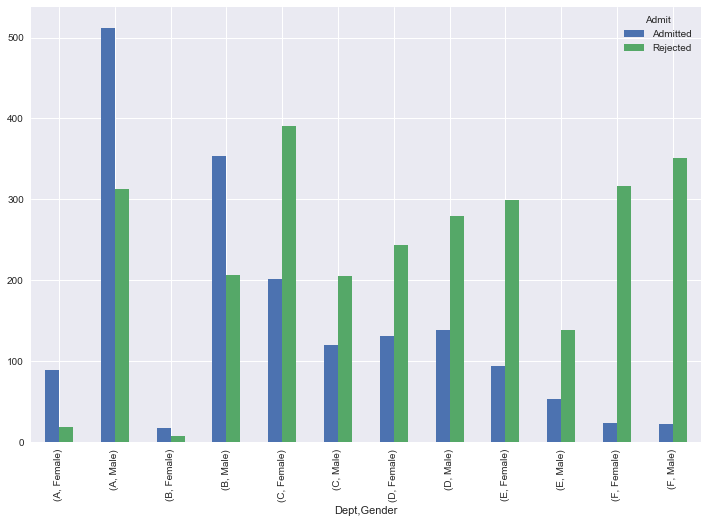

In [128]:
plt.figure(figsize=(20,12))
pd.pivot_table(df,index=df[['Dept','Gender']],columns=df['Admit'],values='Freq').plot(figsize=(12,8),kind='bar')

In [36]:
df_dummies = pd.get_dummies(df,columns=['Gender','Dept','Admit'],drop_first=True)

In [121]:
df_dummies.head()

,Freq,Gender_Male,Dept_B,Dept_C,Dept_D,Dept_E,Dept_F,Admit_Rejected
0,512,1,0,0,0,0,0,0
1,313,1,0,0,0,0,0,1
2,89,0,0,0,0,0,0,0
3,19,0,0,0,0,0,0,1
4,353,1,1,0,0,0,0,0


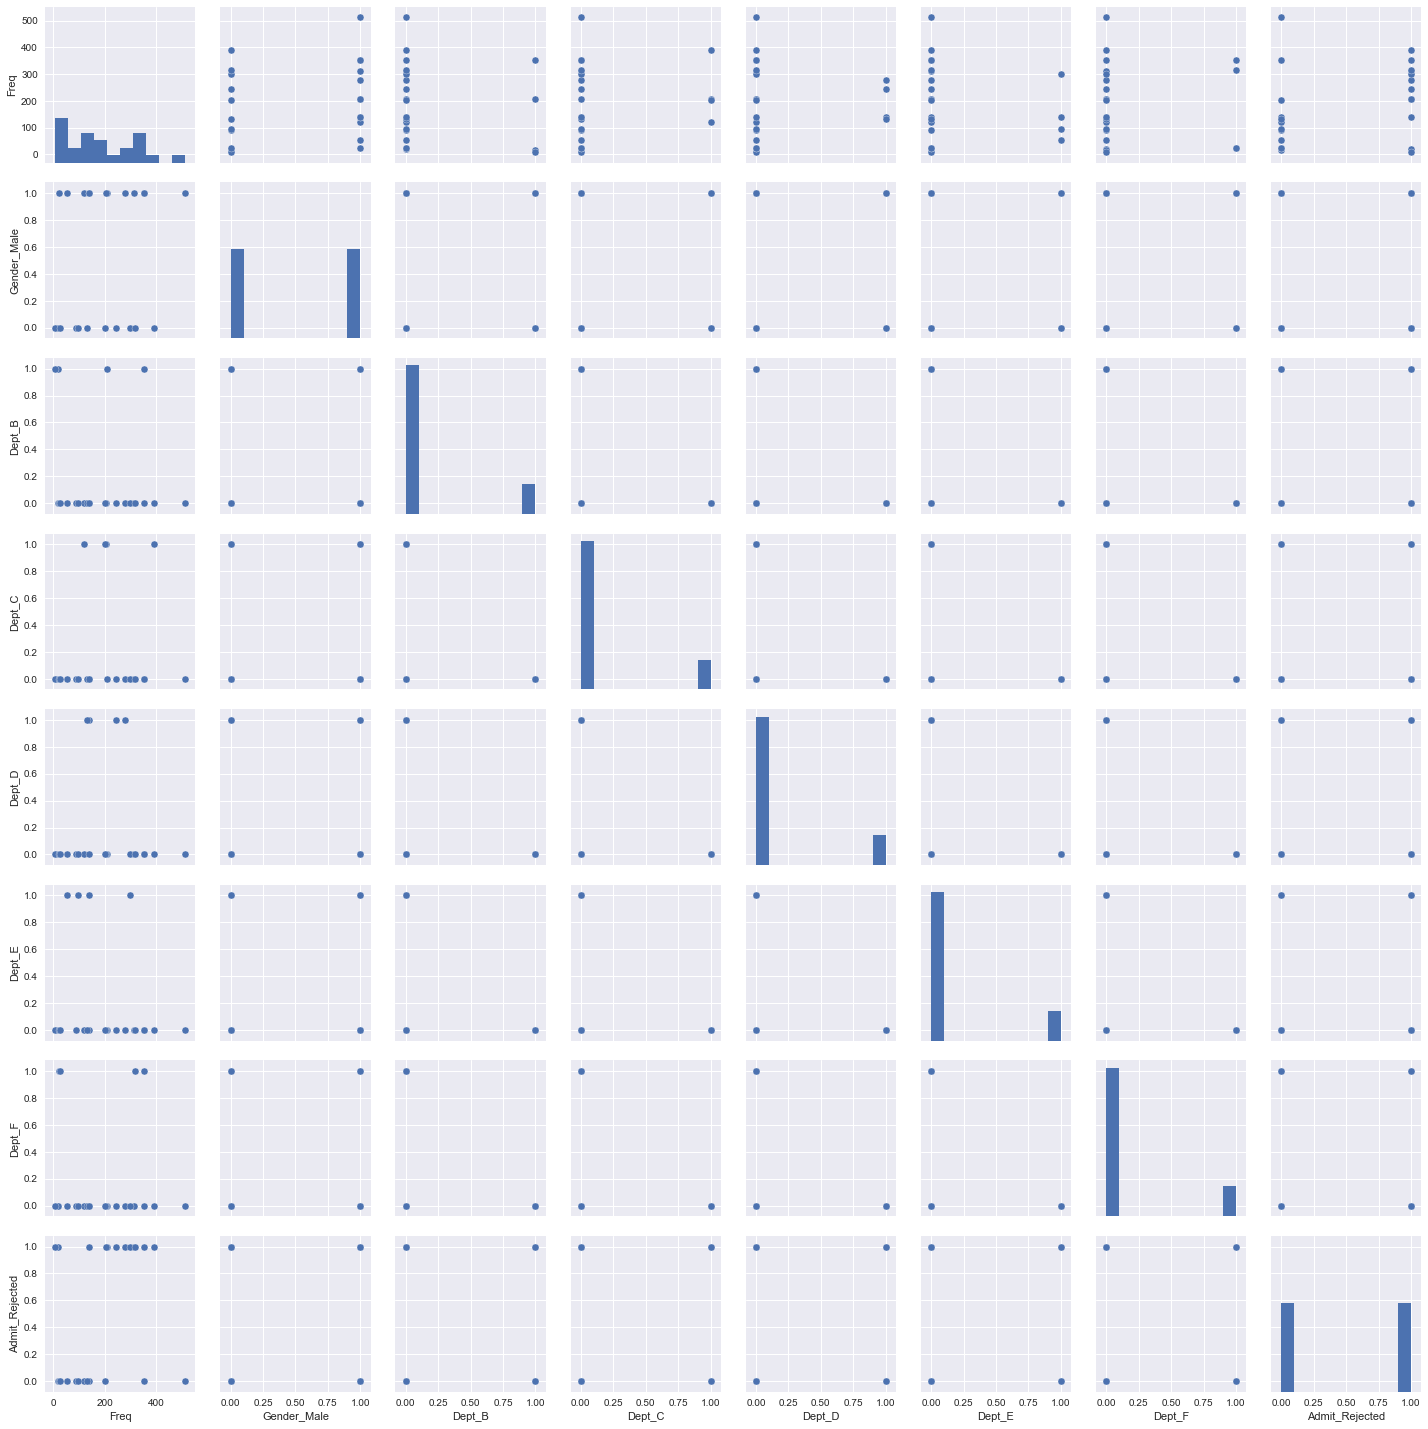

In [38]:
sns.pairplot(df_dummies)

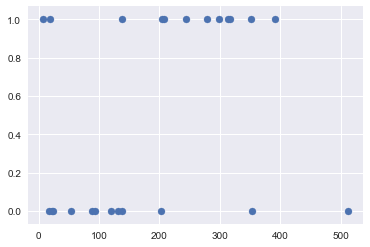

In [42]:
plt.scatter(df_dummies['Freq'],df_dummies['Admit_Rejected'],cmap=['red','blue'])